In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
seacnn = pd.read_csv("../results/output_places_US_mbr_exp.csv")
seacnn = seacnn[~seacnn['name'].isin(['no_clean', 'expire', 'expire+knn'])]

# name_map = {
#     'no_clean': 'No VC',
#     'expire': "VC (Expiration)",
#     'expire+knn': "VC (Expiration + KNN boundry)"
# }

# seacnn['name'] = seacnn['name'].apply(lambda x: name_map[x])

# seacnn['name'] = "SEA-CNN"

res = pd.concat([
    seacnn.loc[:, ['create_mem', 'search_mem', 'num_queries', 'name']],
]).rename(columns={'create_mem': "After creation", 'search_mem': "After search"})

res

,After creation,After search,num_queries,name
0,6681712,6681712,100000,NO
1,24481152,24481152,500000,NO
2,39697848,39697848,1000000,NO
3,101112000,101112000,2500000,NO
4,6681712,6007864,100000,EXPIRE
5,24481152,23693264,500000,EXPIRE
6,39697848,38927920,1000000,EXPIRE
7,101112000,100282040,2500000,EXPIRE


<AxesSubplot:xlabel='No. of queries', ylabel='Index size (MB)'>

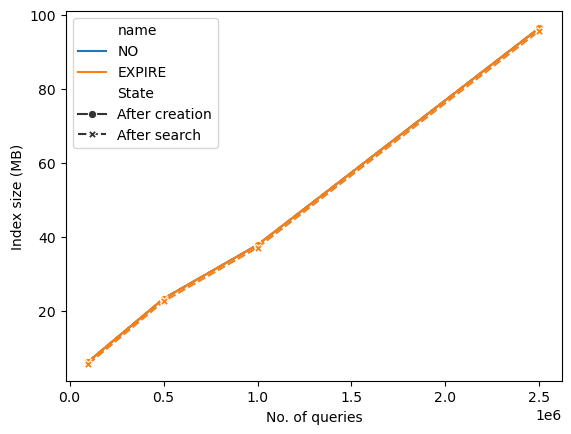

In [3]:
out = res.melt(id_vars=["name", 'num_queries'], var_name="State")
out['value'] = out['value'] / 1048576
out = out.rename(columns={"num_queries": "No. of queries", 'value': "Index size (MB)"})

sns.lineplot(x="No. of queries", y='Index size (MB)', hue='name', style='State', data=out, errorbar=None, markers=True)

In [4]:
out.pivot(index=['No. of queries'], columns=["State", 'name'], values='Index size (MB)')
# out

State          After creation            After search           
name                       NO     EXPIRE           NO     EXPIRE
No. of queries                                                  
100000               6.372177   6.372177     6.372177   5.729546
500000              23.347046  23.347046    23.347046  22.595657
1000000             37.858818  37.858818    37.858818  37.124557
2500000             96.427917  96.427917    96.427917  95.636406